In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
A = np.arange(24).reshape(4,2,3)
A

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [4]:
B = np.ones(12).reshape(2,3,2)
B

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [5]:
k=2

In [6]:
len(A.shape)+len(B.shape)-2*k

2

In [7]:
o1 = np.tensordot(A, B, axes=[[1, 2],[0, 1]])
o1

array([[ 15.,  15.],
       [ 51.,  51.],
       [ 87.,  87.],
       [123., 123.]])

In [8]:
e1 = np.array([1.,0.,0.,0])
e2 = np.array([0.,1.,0.,0.])
e3 = np.array([0.,0.,1.,0])
e4 = np.array([0.,0.,0.,1.])
np.tensordot(e2, e2, axes=0) #passing axes=0 computes outer product

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
e1,e2,e3,e4 = np.eye(4)

In [10]:
x=np.array([1.,2.,3.,4.])
x

array([1., 2., 3., 4.])

In [11]:
I11 = x[0]*np.tensordot(e1, e1, axes=0) #passing axes=0 computes outer product
I22 = x[1]*np.tensordot(e2, e2, axes=0) #passing axes=0 computes outer product
I33 = x[2]*np.tensordot(e3, e3, axes=0) #passing axes=0 computes outer product
I44 = x[3]*np.tensordot(e4, e4, axes=0) #passing axes=0 computes outer product
I11

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
np.tensordot(I11,e1 , axes=0)+np.tensordot(I11,e2 , axes=0)+np.tensordot(I11,e3 , axes=0)+np.tensordot(I11,e4 , axes=0)\
+np.tensordot(I22,e1 , axes=0)+np.tensordot(I22,e2 , axes=0)+np.tensordot(I22,e3 , axes=0)+np.tensordot(I22,e4 , axes=0)\
+np.tensordot(I33,e1 , axes=0)+np.tensordot(I33,e2 , axes=0)+np.tensordot(I33,e3 , axes=0)+np.tensordot(I33,e4 , axes=0)\
+np.tensordot(I44,e1 , axes=0)+np.tensordot(I44,e2 , axes=0)+np.tensordot(I44,e3 , axes=0)+np.tensordot(I44,e4 , axes=0)\

array([[[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [2., 2., 2., 2.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [3., 3., 3., 3.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [4., 4., 4., 4.]]])

In [13]:
out = None
for k, ek in enumerate([e1,e2,e3,e4]):
    for j, ej in enumerate([e1,e2,e3,e4]):
        tmp = x[k]*np.tensordot(ej,ej , axes=0)
        if out is not None:
            out += np.tensordot(tmp, ek,axes=0)
        else:
            out = np.tensordot(tmp, ek,axes=0)
print(out)        

[[[1. 2. 3. 4.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [1. 2. 3. 4.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [1. 2. 3. 4.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [1. 2. 3. 4.]]]


In [14]:
o2 = np.einsum("pqr, qrs->ps", a,b)
o2

NameError: name 'a' is not defined

In [20]:
A.shape[-2:]

(2, 3)

In [50]:
k =2
list(A.shape[:-k]) + list(B.shape[k:])

[4, 2]

In [45]:
A.shape, B.shape

((4, 2, 3), (2, 3, 2))

In [51]:
out = np.zeros(A.shape[:-k]+B.shape[k:])
print(out.shape)
for p in range(4):
    for q in range(2):
        for r in range(3):
            for s in range(2):
                out[p, s]+=A[p,q,r]*B[q, r,s]
out

(4, 2)


array([[ 15.,  15.],
       [ 51.,  51.],
       [ 87.,  87.],
       [123., 123.]])

In [47]:
out1 = np.tensordot(A, B, axes=[[1, 2],[0, 1]])
out1

array([[ 15.,  15.],
       [ 51.,  51.],
       [ 87.,  87.],
       [123., 123.]])

In [51]:
out = np.zeros(A.shape[:-k]+B.shape[k:])
for p in range(4):
    for s in range(2):
        for q in range(2):
            for r in range(3):
                out[p, s]+=a[p,q,r]*b[q, r,s]
out

array([[ 15.,  15.],
       [ 51.,  51.],
       [ 87.,  87.],
       [123., 123.]])

In [52]:
np.equal(out, o1)

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [53]:
M = np.arange(12).reshape((3,4))

In [54]:
out = np.tensordot(M, M, ([0,1], [0,1]))
fob_norm = np.array(np.linalg.norm(M)**2)

In [55]:
print(fob_norm==out)

True


Outer Product

In [56]:
e1 = np.zeros([4, 1]);e2 = np.zeros([4, 1]);

In [57]:
e1[2, 0] = 1; e2[3, 0] = 1

In [58]:
np.tensordot(e1, e2, ((1,0),(1,0)))

array(0.)

In [59]:
W = tf.random.uniform(shape=[4,4])
x = tf.expand_dims(tf.Variable([1., 2., 3., 4]), axis =1)
x.shape

TensorShape([4, 1])

In [60]:
with tf.GradientTape() as tape:
    tape.watch(W)
    y = tf.sigmoid(tf.matmul(W,x))
dy_dW  = tape.jacobian(y, W)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [61]:
print("dy_dW = {} ".format(dy_dW)), dy_dW.shape

dy_dW = [[[[0.00173547 0.00347093 0.0052064  0.00694187]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]]]


 [[[0.         0.         0.         0.        ]
   [0.01806237 0.03612474 0.05418712 0.07224949]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]]]


 [[[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.00116469 0.00232937 0.00349406 0.00465874]
   [0.         0.         0.         0.        ]]]


 [[[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.00210092 0.00420185 0.00630277 0.00840369]]]] 


(None, TensorShape([4, 1, 4, 4]))

In [124]:
y = tf.matmul(W,x)
y1=tf.sigmoid(y)*(1-tf.sigmoid(y))
y1

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.02186307],
       [0.00421308],
       [0.01294293],
       [0.00108958]], dtype=float32)>

In [136]:
sig_grad = None
for i, ei in enumerate([e1,e2,e3,e4]):
    if sig_grad is None:
        sig_grad = np.tensordot(y1[i]*ei,ei , axes=0)
    else:
        sig_grad += np.tensordot(y1[i]*ei,ei , axes=0)
sig_grad

array([[0.02186307, 0.        , 0.        , 0.        ],
       [0.        , 0.00421308, 0.        , 0.        ],
       [0.        , 0.        , 0.01294293, 0.        ],
       [0.        , 0.        , 0.        , 0.00108958]])

In [137]:
grad_linear = None
for k, ek in enumerate([e1,e2,e3,e4]):
    for j, ej in enumerate([e1,e2,e3,e4]):
        tmp = x[k]*np.tensordot(ej,ej , axes=0)
        if grad_linear is not None:
            grad_linear += np.tensordot(tmp, ek,axes=0)
        else:
            grad_linear = np.tensordot(tmp, ek,axes=0)
print(grad_linear)        

[[[1. 2. 3. 4.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [1. 2. 3. 4.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [1. 2. 3. 4.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [1. 2. 3. 4.]]]


In [173]:
grad = None
for j, ej in enumerate([e1,e2,e3,e4]):
    for k, ek in enumerate([e1,e2,e3,e4]):
        tmp = np.tensordot(ej,ek , axes=0)
        if grad is not None:
            grad+= np.tensordot( x[k]*y1[j]*ej,tmp,axes=0)
        else:
            grad = np.tensordot(x[k]*y1[j]*ej,tmp,axes=0)
grad

array([[[0.02186307, 0.04372615, 0.06558922, 0.08745229],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.00421308, 0.00842615, 0.01263923, 0.0168523 ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.01294293, 0.02588586, 0.03882878, 0.05177171],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.00108958, 0.00217915, 0.00326873, 0.0043583 ]]])

In [147]:
sig_grad.shape, grad_linear.shape

((4, 4), (4, 4, 4))

In [171]:
np.tensordot(sig_grad, grad_linear , axes=1) #dot product

array([[[0.02186307, 0.04372615, 0.06558922, 0.08745229],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.00421308, 0.00842615, 0.01263923, 0.0168523 ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.01294293, 0.02588586, 0.03882878, 0.05177171],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.00108958, 0.00217915, 0.00326873, 0.0043583 ]]])

In [5]:
tf.tensordot(x, tf.eye(3), axes=0)

<tf.Tensor: shape=(3, 1, 3, 3), dtype=float32, numpy=
array([[[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]],


       [[[2., 0., 0.],
         [0., 2., 0.],
         [0., 0., 2.]]],


       [[[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]]], dtype=float32)>

In [6]:
with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x)
    y = tf.math.sigmoid(tf.matmul(W,x))
dy_dx  = tape.jacobian(y, x)

In [7]:
tf.squeeze(y, axis=1),y, dy_dx

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.9017576 , 0.89370066], dtype=float32)>,
 <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[0.9017576 ],
        [0.89370066]], dtype=float32)>,
 <tf.Tensor: shape=(2, 1, 3, 1), dtype=float32, numpy=
 array([[[[0.04052413],
          [0.00245794],
          [0.05031923]]],
 
 
        [[[0.00055594],
          [0.08697002],
          [0.00925639]]]], dtype=float32)>)

In [8]:
tf.reduce_sum(dy_dx, axis=[0, 1])

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.04108006],
       [0.08942796],
       [0.05957562]], dtype=float32)>

In [9]:
y1 = tf.matmul(W,x)
#tf.matmul(tf.matmul(tf.linalg.diag(tf.transpose(tf.math.sigmoid(y1)*(1-tf.math.sigmoid(y1))))[0], W),x)
J=tf.linalg.diag(tf.transpose(tf.math.sigmoid(y1)*(1-tf.math.sigmoid(y1))))[0]
J

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.08859083, 0.        ],
       [0.        , 0.09499979]], dtype=float32)>

In [10]:
tf.reduce_sum(tf.matmul(J, W), axis = 0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.04108006, 0.08942796, 0.05957562], dtype=float32)>

In [11]:
tf.linalg.diag(tf.transpose(tf.math.sigmoid(y1))).shape

TensorShape([1, 2, 2])

In [12]:
w= tf.Variable(3.)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(w*x)

dy_dx = tape.gradient(y, x)

In [13]:
dy_dx

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.13552997],
       [0.0073994 ],
       [0.0003701 ]], dtype=float32)>

In [14]:
tf.math.sigmoid(w*x)*(1-tf.math.sigmoid(w*x))*w

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.13552997],
       [0.0073994 ],
       [0.0003701 ]], dtype=float32)>

In [8]:
def step(k, type=1):
    if type ==1:
        return 2+3/np.math.pow(2, k+1)
    elif type==2:
        return 1/np.math.pow(2, k+1)
    else: return 1

In [10]:
step(1)

2.75

In [11]:
x0=2

In [15]:
def update(x, k, type=1):
    return x+np.sign(-x)*step(k, type)

In [16]:
update(x0, 0)

-1.5

In [21]:
x = x0
for k in range(20):
    x = update(x, k, type=1)
    print(k, x, x**2)
    k=k+1    

0 -1.5 2.25
1 1.25 1.5625
2 -1.125 1.265625
3 1.0625 1.12890625
4 -1.03125 1.0634765625
5 1.015625 1.031494140625
6 -1.0078125 1.01568603515625
7 1.00390625 1.0078277587890625
8 -1.001953125 1.0039100646972656
9 1.0009765625 1.0019540786743164
10 -1.00048828125 1.000976800918579
11 1.000244140625 1.0004883408546448
12 -1.0001220703125 1.0002441555261612
13 1.00006103515625 1.0001220740377903
14 -1.000030517578125 1.0000610360875726
15 1.0000152587890625 1.0000305178109556
16 -1.0000076293945312 1.0000152588472702
17 1.0000038146972656 1.0000076294090832
18 -1.0000019073486328 1.0000038147009036
19 1.0000009536743164 1.0000019073495423


In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def Rosenbrock(x, y, a=1, b=10):
    return (a-x)**2 + b*(y-x**2)**2

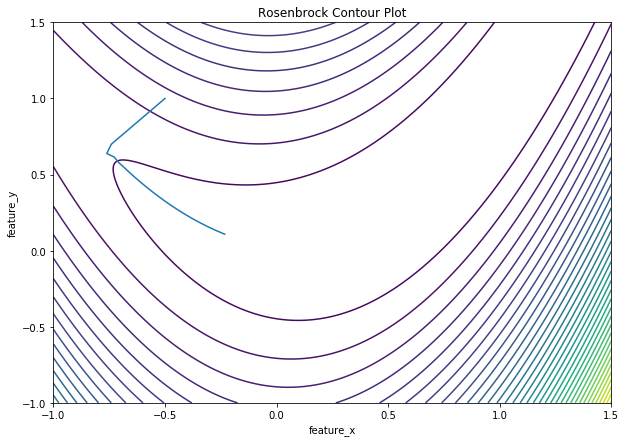

In [101]:
feature_x = np.linspace(-1.0, 1.5, 1000)
feature_y = np.linspace(-1.0, 1.5, 1000)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
  
fig, ax = plt.subplots(1, 1, figsize=(10,7))

a = 1;b=10;
Z = np.square(a-X)+b*np.square((Y-np.square(X)))
ax.contour(X, Y, Z, levels=40)
ax.set_title('Rosenbrock Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
plt.plot(x_,y_,)  
plt.show()

In [33]:
X

array([[-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       ...,
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ]])

In [44]:
def Rosenbrock(x, y, a=1, b=10):
    return (a-x)**2+b*(y-x**2)**2
def Rosenbrock_grad(x, y, a=1, b=10):
    return np.array([2*(x-a)-4*b*(y-x**2)*x,   2*b*(y-x**2)])

In [43]:
Rosenbrock_grad(-.5, 2.)

array([32., 35.])

In [130]:
def line_search(X, descent_dir, alpha= 0.4, beta=.5):
    t =1
    for i in range(20):
        X_new = X + t*descent_dir
        if Rosenbrock(X_new[0], X_new[1]) < Rosenbrock(X[0], X[1]) - beta*np.square(np.linalg.norm(descent_dir)):            
            return t
        #else:
        #    print(t, Rosenbrock(X_new[0], X_new[1]) , Rosenbrock(X[0], X[1]) + beta*np.square(np.linalg.norm(descent_dir)))
        t = t*alpha
    return 1   

In [128]:
x = np.array([-.5, 1.])
line_search(x, -Rosenbrock_grad(x[0], x[1]))

1 290032.875 192.375
0.4 10989.171000000004 192.375
0.16000000000000003 538.2498096000003 192.375


0.06400000000000002

In [131]:
#initial point
x = np.array([-.5, 1.])
t = .02
alpha = 0.3
x_ = [x[0]];y_=[x[1]]
for i in range(20):
    t = line_search(x, Rosenbrock_grad(x[0], x[1]))
    x = x - t*Rosenbrock_grad(x[0], x[1])
    
    print(x, Rosenbrock(x[0], x[1]))
    x_.append(x[0])
    y_.append(x[1])

[-12.5 -14. ] 290032.875
[85139.5  3391. ] 5.2544102115035107e+20
[-2.46861336e+16  1.44974625e+11] 3.713746854653987e+66
[6.01754316e+50 1.21881038e+34] 1.3112238989365244e+204
[-8.71600827e+153  7.24216514e+102] inf
[inf inf] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan
[nan nan] nan


C:\Users\tghosh\AppData\Local\Continuum\anaconda3\envs\dl2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\tghosh\AppData\Local\Continuum\anaconda3\envs\dl2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\tghosh\AppData\Local\Continuum\anaconda3\envs\dl2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\tghosh\AppData\Local\Continuum\anaconda3\envs\dl2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\tghosh\AppData\Local\Continuum\anaconda3\envs\dl2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


0.2563995359435495

In [63]:
import tensorflow as tf
W = tf.random.uniform(shape=[4,4])
x = tf.expand_dims(tf.Variable([1., 2., 3., 4]), axis =1)
with tf.GradientTape() as tape:
    tape.watch(W)
    y = tf.matmul(W,x)
dy_dW = tape.jacobian(y, W)
dy_dW

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


<tf.Tensor: shape=(4, 1, 4, 4), dtype=float32, numpy=
array([[[[1., 2., 3., 4.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.],
         [1., 2., 3., 4.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [1., 2., 3., 4.],
         [0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [1., 2., 3., 4.]]]], dtype=float32)>